In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
data = pd.read_csv('../data/interim/data.csv')
labels = pd.read_csv('../data/interim/labels.csv')

Text(0.5, 1.0, 'Correlation matrix')

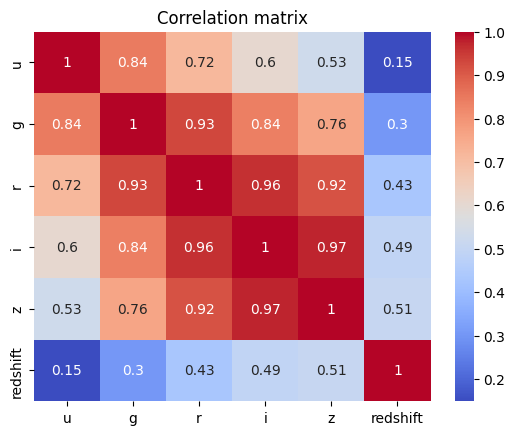

In [7]:
# Correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')

In [10]:
group_ugr = data[['u', 'g', 'r']]
group_iz = data[['i', 'z']]
group_ugriz = data[['u', 'g', 'r', 'i', 'z']]

## Using PCA

<Axes: xlabel='pca1', ylabel='pca2'>

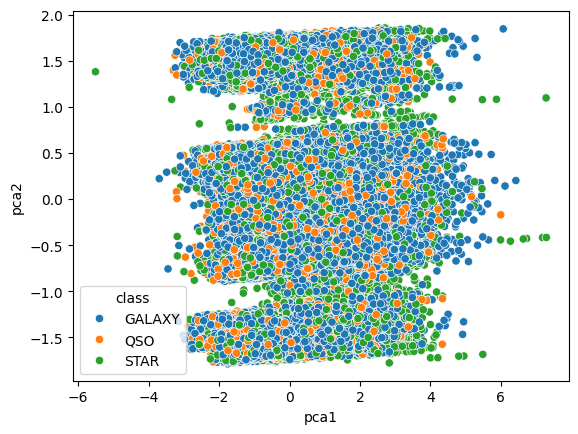

In [7]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data)
pca_result = pd.DataFrame(pca_result, columns=['pca1', 'pca2', 'pca3'])
pca_result['class'] = y
sns.scatterplot(x='pca1', y='pca2', hue='class', data=pca_result)


<Axes: >

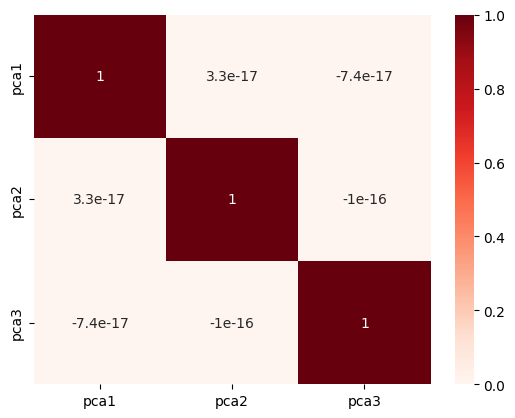

In [12]:
X_pca = pca_result.drop(['class'], axis=1)
y_pca = pca_result['class']

correlation_matrix = X_pca.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)

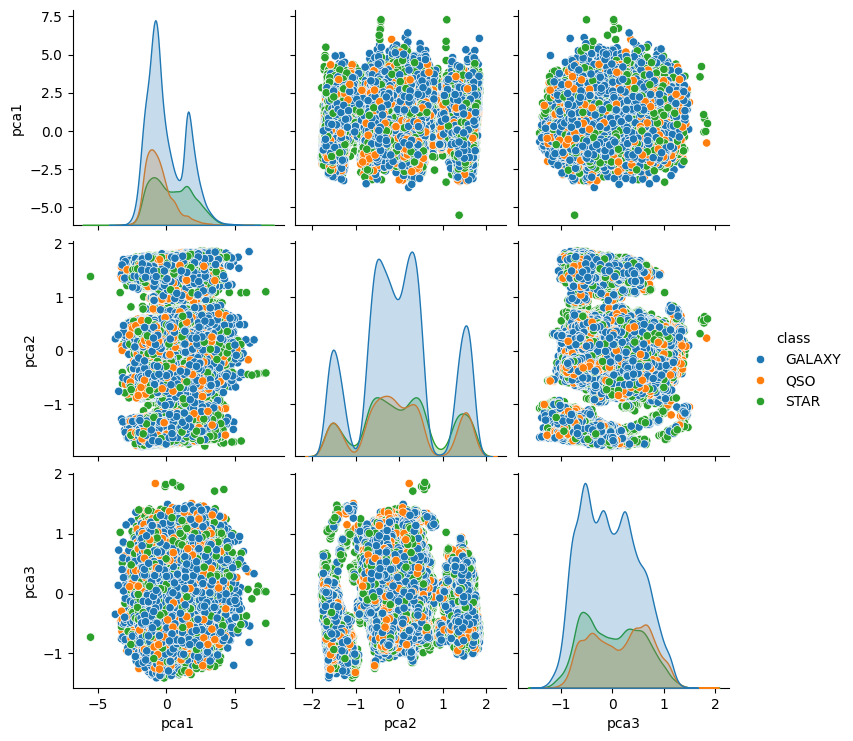

In [17]:
sns.pairplot(pca_result, hue='class')

<Axes: xlabel='umap1', ylabel='umap2'>

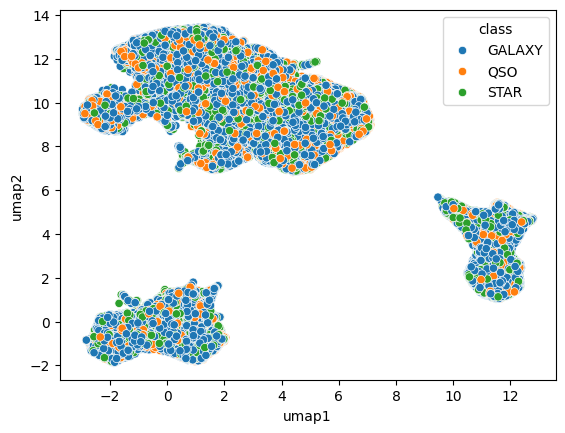

In [9]:
# UMAP
reducer = umap.UMAP(n_components=3)
umap_result = reducer.fit_transform(X)
umap_result = pd.DataFrame(umap_result, columns=['umap1', 'umap2', 'umap3'])
umap_result['class'] = y

sns.scatterplot(x='umap1', y='umap2', hue='class', data=umap_result)


<Axes: >

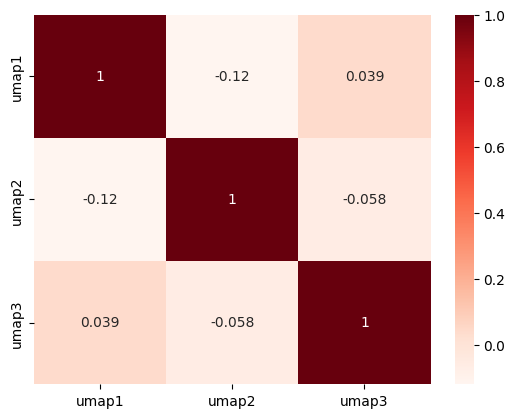

In [13]:
# correlation matrix
X_umap = umap_result.drop(['class'], axis=1)
y_umap = umap_result['class']

correlation_matrix = X_umap.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)

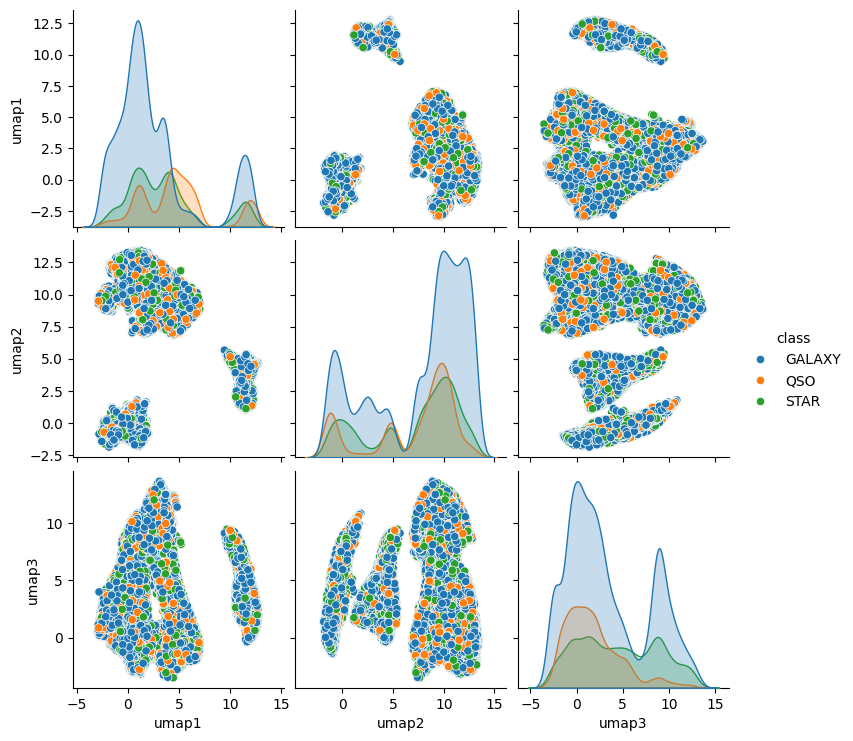

In [18]:
sns.pairplot(umap_result, hue='class')

In [6]:
# Keep alpha and delta and make a lda with the remaining features

# LDA
lda = LDA(n_components=2)
X_features_to_lda = X.drop(['delta', 'alpha'], axis=1)

lda_X_result = lda.fit_transform(X_features_to_lda, y)

# mix lda result with alpha and delta
lda_result = pd.DataFrame(lda_X_result, columns=['lda1', 'lda2'])
lda_result['delta'] = X['delta']
lda_result['alpha'] = X['alpha']
lda_result['class'] = y


<Axes: >

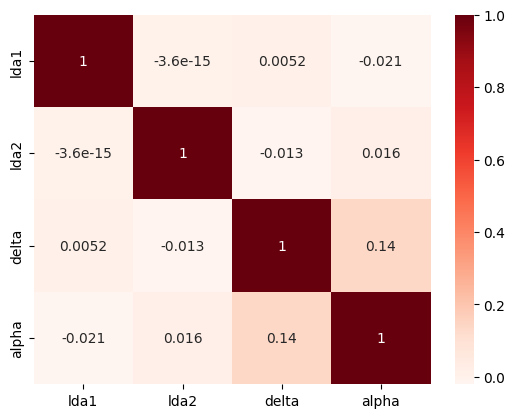

In [7]:
# Display correlation matrix
X_lda = lda_result.drop(['class'], axis=1)
y_lda = lda_result['class']
correlation_matrix = X_lda.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)


<Axes: xlabel='lda1', ylabel='lda2'>

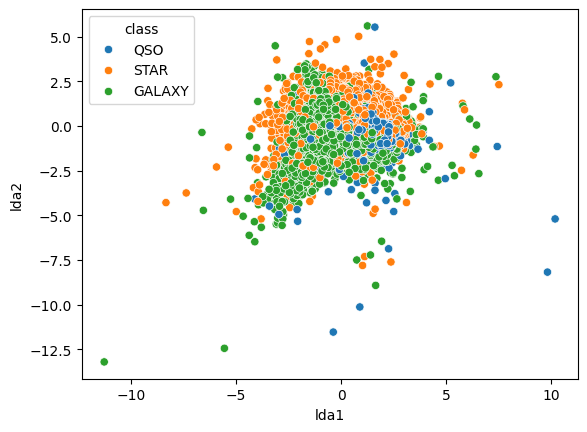

In [8]:
# Display scatter plot
sns.scatterplot(x='lda1', y='lda2', hue='class', data=lda_result)

In [13]:
# LDA with g r i 
X_features_to_lda = X[['g', 'r', 'i']]
lda_X_result = lda.fit_transform(X_features_to_lda, y)
df_lda = pd.DataFrame(lda_X_result, columns=['lda1', 'lda2'])
df_lda['alpha'] = X['alpha']
df_lda['delta'] = X['delta']
df_lda['u'] = X['u']
df_lda['z'] = X['z']
df_lda['class'] = y




<Axes: >

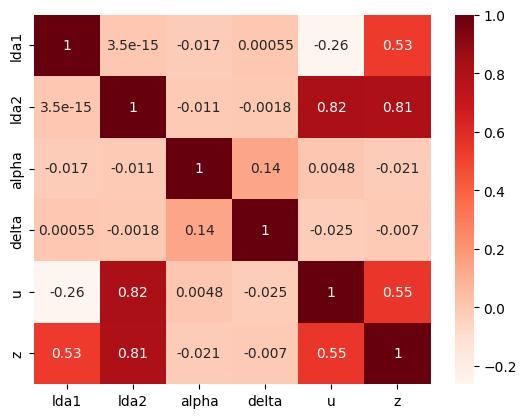

In [14]:
correlation_matrix = df_lda.drop(['class'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)